# P-ONE basic data analysis-2

The data analysis has been performed on a P-ONE simulation file. Each file has 1000 DAQ frames, which corresponds to 1000 events. Here, the data shown is for 66000 events. Each frame contains following 9 files, each with an unique set of information:

1) **I3EventHeader**: Contains general info about the overall event, like start and end times, event ID, etc.  <br>
2) **I3MCTree**: Contains detailed info about the primary particles (i.e. neutrinos), hadrons at the interaction vertex and all the secondary particles that travel through the medium, i.e. electrons, muons or tauons. <br>
3) **I3MCTree_NuGen**: Contains info about the incoming neutrinos and hadrons formed at the interaction vertex. <br>
4) **I3MCTree_NuGen_RNGState**: Not really that important for data analysis.  <br>
5) **I3MCWeightDict**: Contains detailed info about the physical properties of the detector and data related to the incoming neutrinos.  <br>
6) **I3Photons**: Contains information about the DOMs activated, along with the location of the DOMs and the timing of arrival of pulse. <br>
7) **MCTimeIncEventID**: A boolean file, not that important. <br>
8) **MMCTrackList**: Contains info about the secondary particles that travel through the medium. <br>
9) **NuGPrimary**: Contains info about the primary particles (i.e. neutrinos) reaching the detector from their sources. <br>

In [1]:
from I3Tray import *
from icecube import icetray, dataclasses, phys_services, sim_services, dataio,  earthmodel_service, neutrino_generator, tableio, hdfwriter
from icecube.simprod import segments
from icecube.icetray import I3Units, I3Frame
from icecube.dataclasses import I3Particle
from icecube.simclasses import I3MMCTrack
from icecube.icetray import I3Units, OMKey, I3Frame
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import sys, os
import math
import os.path
from os import path

### 1. Plots for Energy vs Nhits (Nhits= Number of DOMs activated)

In [11]:
nhits=[]
energy_primary=[]
for i in range(0,400):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst"
        infile=dataio.I3File(infile_name)
        infile.pop_frame()
        for frame in infile:
            infile.pop_frame()
            pulseseriesmap=frame['I3Photons']
            nhits.append(len(pulseseriesmap.keys()))
            energy_primary.append(frame['NuGPrimary'].energy)
    else:
        continue

In [12]:
energy_primary=np.log10(energy_primary)

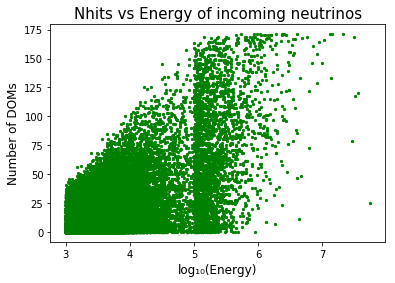

In [13]:
plt.scatter(energy_primary, nhits,color='green',s=5)
plt.xlabel("log\u2081\u2080(Energy)",fontsize=12)
plt.ylabel("Number of DOMs",fontsize=12)
plt.title("Nhits vs Energy of incoming neutrinos",fontsize=15)
plt.show()

### 2. Plots for Energy vs Total number of pulses

In [27]:
pulse_count=[]
energy_primary=[]
for i in range(0,100):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst"
        infile=dataio.I3File(infile_name)
        infile.pop_frame()
        for frame in infile:
            pulses=0
            infile.pop_frame()
            energy_primary.append(frame['NuGPrimary'].energy)
            pulseseriesmap=frame['I3Photons']
            for omkey in pulseseriesmap.keys():
                for pulse in pulseseriesmap[omkey]:
                    pulses=pulses+1
            pulse_count.append(pulses)
    else:
        #print("False")
        continue
print(pulse_count)

[28, 0, 19, 36, 0, 97, 11, 1, 206, 11, 1, 0, 0, 17, 0, 0, 226, 2, 5, 95, 2, 86, 4, 20, 450, 4, 2, 28, 2, 0, 172, 12, 24, 13, 120, 0, 0, 514, 0, 8, 69, 0, 5, 879, 0, 1, 1, 324, 170, 2, 39, 191, 631, 4, 0, 89, 0, 2, 0, 49, 35, 60, 22, 0, 36, 0, 5, 1, 1, 4, 0, 151, 0, 1, 211, 1, 10, 6, 22, 15, 106, 4, 17, 0, 16, 0, 95, 88, 38, 3, 56, 8, 8, 0, 19, 46, 7, 4, 66, 27, 12, 1, 88, 2, 2, 40, 75, 70, 364, 25, 146, 1, 415, 52, 106, 1, 20, 197, 129, 6, 0, 66, 0, 7, 0, 0, 0, 53, 201, 0, 4, 77, 0, 17, 2, 32, 23, 190, 4, 72, 53, 0, 3, 104, 0, 13, 31, 0, 2752, 0, 23, 0, 2, 5, 27, 2, 76, 6, 0, 7, 348, 10, 9, 14, 1258, 21, 40, 54, 1, 9, 7, 82, 1, 11, 6, 7, 0, 3, 1, 33, 10, 0, 23, 1, 18, 95, 3, 22, 23, 220, 0, 39, 3, 10, 3, 2, 1, 5, 89, 1, 0, 21, 102, 0, 8, 0, 2, 0, 12, 7, 27, 11, 60, 8, 0, 4, 1, 3, 18, 162, 1, 2, 5, 109, 0, 68, 11, 1199, 11, 0, 1, 1728, 35, 15, 25, 28, 8, 46, 0, 0, 414, 23, 4, 1, 0, 79, 6, 1, 7, 0, 0, 7, 27, 64, 0, 2, 38, 4, 0, 20, 0, 18, 14, 24, 3, 38, 90, 0, 166, 35, 219, 1, 1, 15, 146

In [28]:
energy_primary=np.log10(energy_primary)

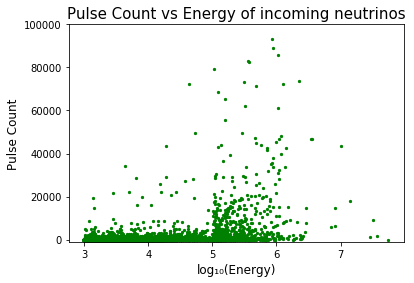

In [34]:
plt.scatter(energy_primary, pulse_count,color='green',s=5)
plt.xlabel("log\u2081\u2080(Energy)",fontsize=12)
plt.ylabel("Pulse Count",fontsize=12)
plt.title("Pulse Count vs Energy of incoming neutrinos",fontsize=15)
#plt.ticklabel_format(style='plain') 
plt.ylim(-1000,100000)
plt.show()

### Just to count the number of events:

In [18]:
events=0
for i in range(0,400):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst"
        infile=dataio.I3File(infile_name)
        infile.pop_frame()
        for frame in infile:
            events=events+1
            infile.pop_frame()
print("Number of events:", events)

Number of events: 66000


### Splitting into flavors...

#### 1) Electron neutrinos

In [3]:
nhits_nue=[]
energy_primary_nue=[]
for i in range(0,400):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst"
        infile=dataio.I3File(infile_name)
        infile.pop_frame()
        for frame in infile:
            infile.pop_frame()
            if(frame['NuGPrimary'].pdg_encoding==12 or frame['NuGPrimary'].pdg_encoding==-12):
                pulseseriesmap=frame['I3Photons']
                nhits_nue.append(len(pulseseriesmap.keys()))
                energy_primary_nue.append(frame['NuGPrimary'].energy)
    else:
        continue

In [4]:
energy_primary_nue=np.log10(energy_primary_nue)

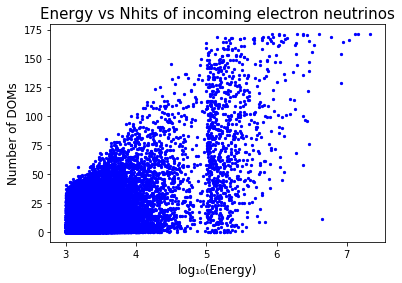

In [7]:
plt.scatter(energy_primary_nue,nhits_nue,color='blue',s=5)
plt.xlabel("log\u2081\u2080(Energy)",fontsize=12)
plt.ylabel("Number of DOMs",fontsize=12)
plt.title("Energy vs Nhits of incoming electron neutrinos",fontsize=15)
plt.ticklabel_format(style='plain') 
plt.show()

#### 2) Muon neutrinos

In [6]:
nhits_numu=[]
energy_primary_numu=[]
for i in range(0,400):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst"
        infile=dataio.I3File(infile_name)
        infile.pop_frame()
        for frame in infile:
            infile.pop_frame()
            if(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):
                pulseseriesmap=frame['I3Photons']
                nhits_numu.append(len(pulseseriesmap.keys()))
                energy_primary_numu.append(frame['NuGPrimary'].energy)
    else:
        continue

In [8]:
energy_primary_numu=np.log10(energy_primary_numu)

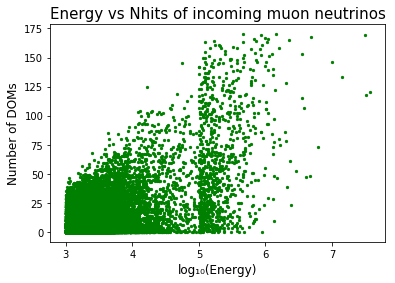

In [9]:
plt.scatter(energy_primary_numu,nhits_numu,color='green',s=5)
plt.xlabel("log\u2081\u2080(Energy)",fontsize=12)
plt.ylabel("Number of DOMs",fontsize=12)
plt.title("Energy vs Nhits of incoming muon neutrinos",fontsize=15)
plt.ticklabel_format(style='plain') 
plt.show()

#### 3) Tau neutrinos

In [10]:
nhits_nutau=[]
energy_primary_nutau=[]
for i in range(0,400):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst"
        infile=dataio.I3File(infile_name)
        infile.pop_frame()
        for frame in infile:
            infile.pop_frame()
            if(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):
                pulseseriesmap=frame['I3Photons']
                nhits_nutau.append(len(pulseseriesmap.keys()))
                energy_primary_nutau.append(frame['NuGPrimary'].energy)
    else:
        continue

In [11]:
energy_primary_nutau=np.log10(energy_primary_nutau)

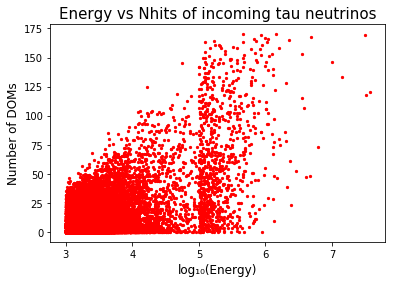

In [12]:
plt.scatter(energy_primary_nutau,nhits_nutau,color='red',s=5)
plt.xlabel("log\u2081\u2080(Energy)",fontsize=12)
plt.ylabel("Number of DOMs",fontsize=12)
plt.title("Energy vs Nhits of incoming tau neutrinos",fontsize=15)
plt.ticklabel_format(style='plain') 
plt.show()